# <span style="color:red; font-size:20px;">Importing packages</span>

In [1]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

# <span style="color:red; font-size:20px;"> Loading the dataset</span>

In [2]:
airline = pd.read_csv("Airline_customer_satisfaction.csv")
airline.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0



<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:40px 90px;
             font-weight:bold;
             border:2px solid yellow;
             padding:15px 50px;">Step 2: Data exploration, data cleaning, and model preparation
</span>


# <span style="color:red; font-size:20px;"> Exploring the data</span>

In [3]:
???

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [4]:
???

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000



# <span style="color:red; font-size:20px;"> Output unique values
</span>

The `Class` column represents ordinal data, where there's a meaningful order. For instance, airlines usually price **'Business'** higher than **'Eco Plus' and 'Eco'**. Let's output the unique values found in the `Class` column.

In [5]:
airline['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)


# <span style="color:red; font-size:20px;">  Checking the counts of the predicted labels
</span>

To assess the balance of the dataset for **predicting customer satisfaction**, it's essential to examine the distribution of each predicted label by checking their respective counts.

In [6]:
airline['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

* There are **71087 satisfied** customers and **58793 dissatisfied customers.**
* **54.7 percent (71087/129880)** of customers were satisfied. This value can be compared to a **decision tree's model accuracy**. 
***


# <span style="color:red; font-size:20px;"> Checking missing values

 </span>
 
 As the **sklearn decision tree implementation** does not support missing values, we need to check for missing values.

In [7]:
airline.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Customer Type                          0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Inflight wifi service                  0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Inflight entertainment                 0
dtype: int64

Since the missing values constitute less than **0.5%** of the dataset, dropping them at this level is unlikely to significantly impact the result.
***

In [8]:
df_airline = ???

In [9]:
df_airline.shape

(129487, 22)

# <span style="color:red; font-size:20px;"> Encoding the data

 </span>
 
 To prepare the dataset for use with decision trees, it's necessary to convert the ordinal `Class` column, along with other object type columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`), into **numeric format**, as **decision trees** require numeric inputs.

In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

class_encoder = ???

In [11]:
df_airline['Class'] = class_encoder.fit_transform(df_airline[['Class']])

In [13]:
df_airline.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,0.0,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,2.0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,0.0,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,0.0,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,0.0,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [20]:
class_encoder.categories_

[array(['Eco', 'Eco Plus', 'Business'], dtype=object)]

# <span style="color:red; font-size:20px;"> Representing the data in the target variable numerically

 </span>
 
 To express the data in the target variable numerically, we allocate the label `1` to the category `"satisfied"` and the label `0` to the category `"dissatisfied" ` within the `satisfaction` column.
 

In [14]:
satisfaction_encoder = ???

In [15]:
df_airline['satisfaction'] = satisfaction_encoder.fit_transform(df_airline[['satisfaction']])

C:\Users\Phone Myint Naing\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
df_airline.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,0.0,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,2.0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,0.0,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,0.0,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,0.0,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [19]:
satisfaction_encoder.classes_

array(['dissatisfied', 'satisfied'], dtype=object)

# <span style="color:red; font-size:20px;"> Converting categorical columns into numeric

 </span>

In [13]:
df_airline['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [15]:
df_airline['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [21]:
cust_type_encoder = ???
travel_type_encoder = ???

In [22]:
df_airline['Customer Type'] = cust_type_encoder.fit_transform(df_airline[['Customer Type']])
df_airline['Type of Travel'] = travel_type_encoder.fit_transform(df_airline[['Type of Travel']])

C:\Users\Phone Myint Naing\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Phone Myint Naing\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
df_airline.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,0.0,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,2.0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,0.0,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,0.0,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,0.0,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [24]:
cust_type_encoder.classes_

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [25]:
travel_type_encoder.classes_

array(['Business travel', 'Personal Travel'], dtype=object)

# <span style="color:red; font-size:20px;"> Creating the training and testing data

 </span>
 
 We put `75%` of the data into a training set and the remaining `25%` into a testing set.

In [26]:
X = ???
y = ???

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# <span style="color:red; font-size:20px;"> Fitting a decision tree classifier model to the data

 </span>
 
We begin by creating a **decision_tree** model instance named `decision_tree` and set the `random_state` parameter to `0`. Next, we **train** the model using the **training set**. Following training, we apply the `predict()` function to the testing set to **obtain predictions**, storing them in the variable `dt_pred`.
 

In [28]:
decision_tree = ???
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:40px 90px;
             font-weight:bold;
             border:2px solid yellow;
             padding:15px 50px;">Step 4: Results and evaluation
</span>

In [29]:
dt_pred = ???

Now we printing out the **decision tree** model's `accuracy`, `precision`, `recall`, and `F1` score.

In [30]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.932891
Precision: 0.935394
Recall: 0.942644
F1 Score: 0.939005


Our results demonstrate **high performance**, which is a **positive outcome**. However, `Decision trees` are prone to **overfitting**, but employing **hyperparameter tuning** alongside **grid search** can mitigate this issue. For example, adjusting the `maximum depth` parameter could alleviate overfitting by restricting the depth of the decision tree.
***

# <span style="color:red; font-size:20px;"> Producing a confusion matrix

 </span>

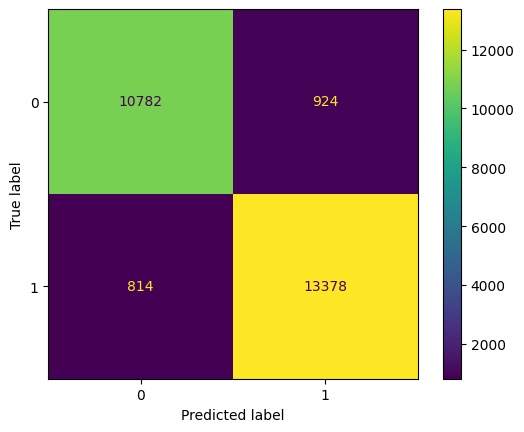

In [31]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = ???)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ???)
disp.plot()

* In the confusion matrix, there are a high proportion of `true positives` and `true negatives` (**where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively**).

* The matrix also had a relatively low number of `false positives` and `false negatives` (**where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively**.)
***

# <span style="color:red; font-size:20px;"> Plotting the decision tree
 </span>
 
 By using `plot_tree` function we produce a visual representation of the tree to pinpoint where the splits in the data are occurring

In [34]:
df_airline.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

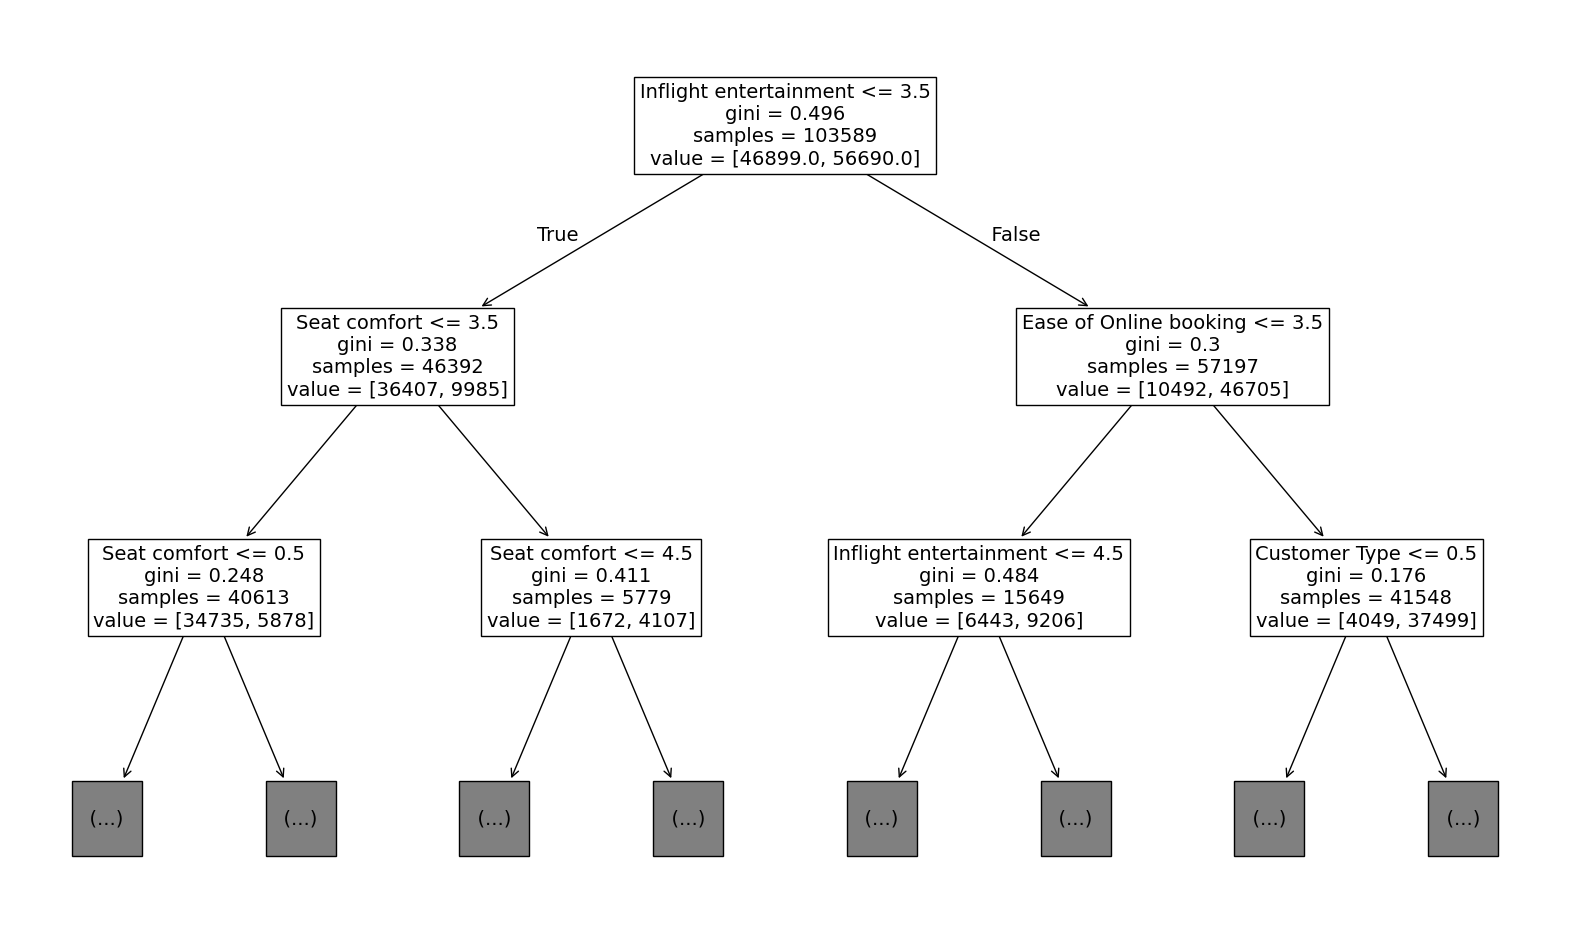

In [32]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

# <span style="color:red; font-size:22px;"> Calculating feature importance
 </span>
 
The `DecisionTreeClassifier` class comes with a <span style="color:red; font-size:25px;"> [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)
 </span>  attribute that provides access to the features' relative importance in the model. The feature importances are computed when the `fit()` method is called on the `DecisionTreeClassifier` instance. In other words, it's information that is generated during model training. Here's how it works.

For each feature used in the **tree**, the algorithm finds all of the decision nodes that use that particular feature as the split criterion. Then for each of those decision nodes it computes the decrease in Gini impurity (or entropy, or log loss, or whatever metric you select when you fit the model&mdash;default is Gini impurity) that results from that split (so, the decrease from parent to children). Then the algorithm sums up the decreases across all the decisions made using that feature and expresses it as a percentage of the total decrease that resulted from _all_ features. 

Using the `feature_importances_` attribute to fetch the relative importances of each feature, we can then plot the results.

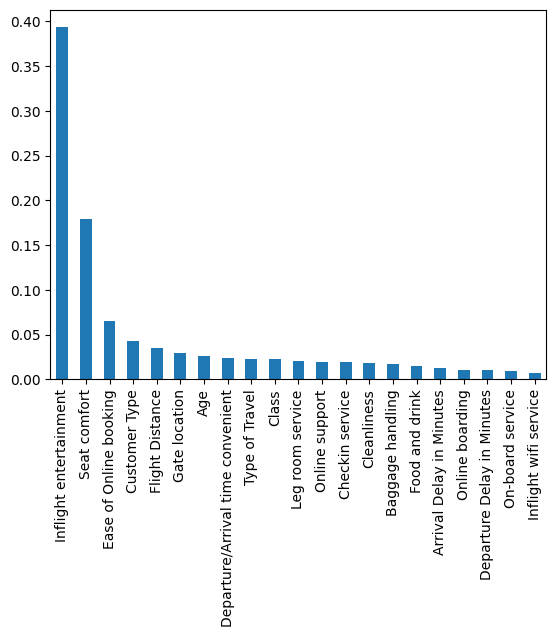

In [35]:
importances = ???

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features for this model. 
***

# <span style="color:red; font-size:22px;"> Hyperparameter tuning
 </span>
 
 
Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. Now, we will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using **grid search** and **cross validation**. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [51]:
tree_para = {'max_depth':[10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}



# <span style="color:red; font-size:22px;"> Checking combinations of values
 </span>
 
 
We'll evaluate each combination of values to determine which pair yields the best evaluation metrics. First, create a decision tree model instance named `tuned_decision_tree` with `random_state=0`. Then, instantiate a `GridSearchCV` instance named `clf`, ensuring that the estimator is refit using `"f1"`, and finally, fit the model on the training set.

In [52]:
tuned_decision_tree = DecisionTreeClassifier()

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = 'f1', 
                   cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             scoring='f1')

# <span style="color:red; font-size:22px;"> Computing the best combination of values for the hyperparameters
 </span>


In [53]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_leaf=5)

* After running the **DecisionTreeClassifier**, the maximum depth is **18** and the minimum number of samples is **two**, meaning this is the **best combination** of values.
***


# <span style="color:red; font-size:22px;"> Determining the best average validation score
 </span>

In [54]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9447


# <span style="color:red; font-size:22px;"> Plotting the "best" decision tree
 </span>

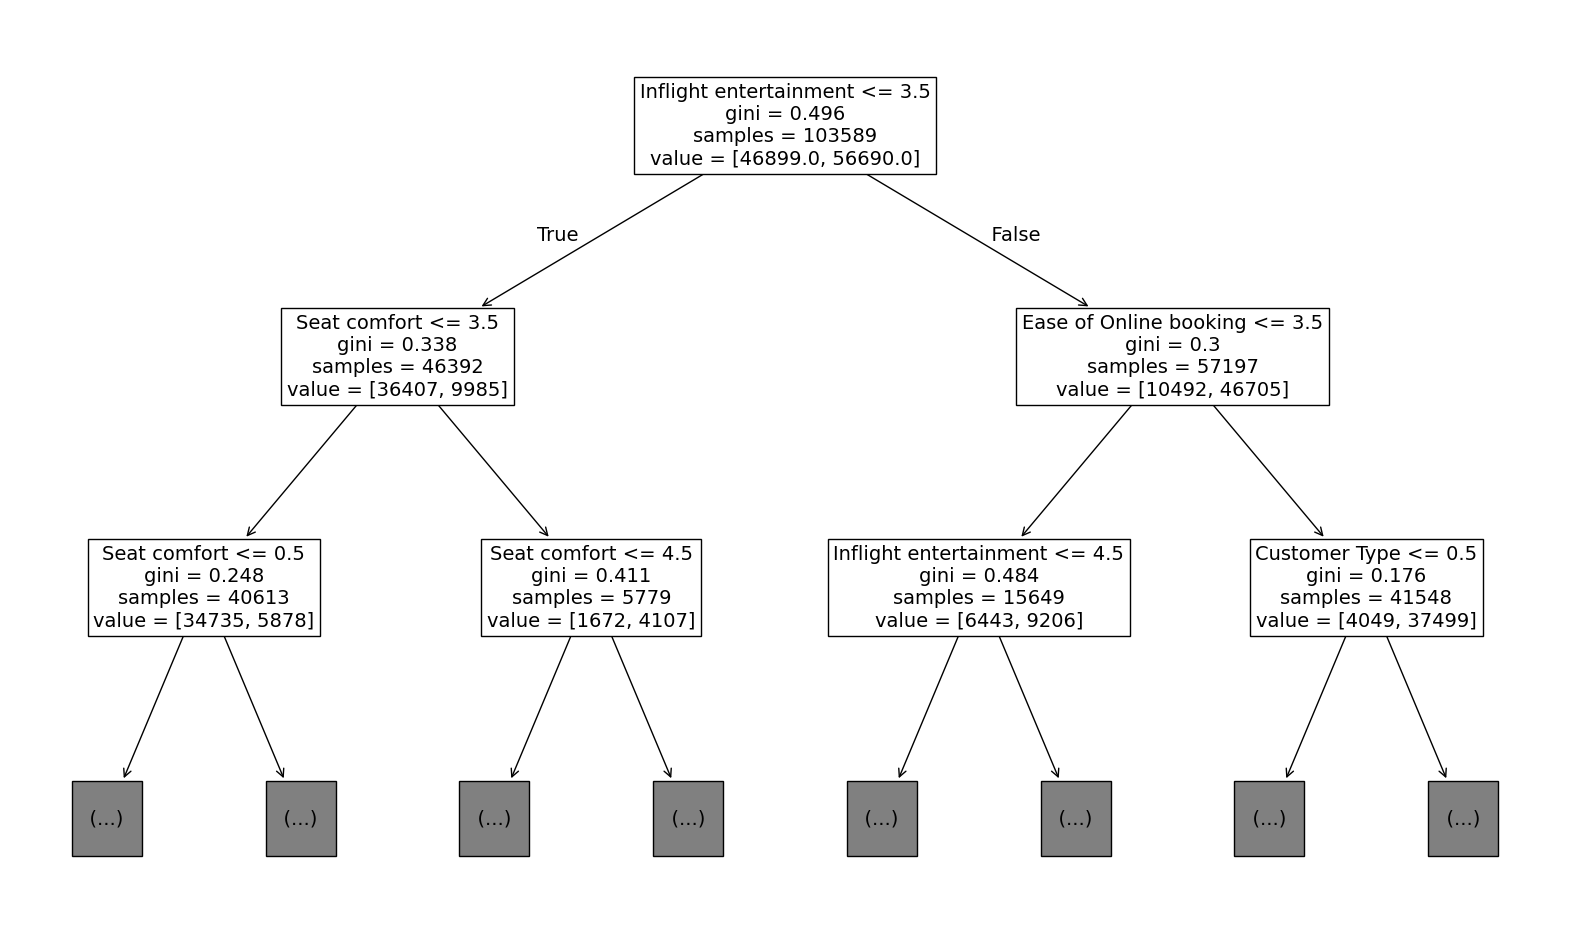

In [55]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

The plot makes it seem like `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are among the most important features. The code below outputs a **"most important"** features graph from the model.
***

# <span style="color:red; font-size:22px;"> Building another feature importance graph
 </span>

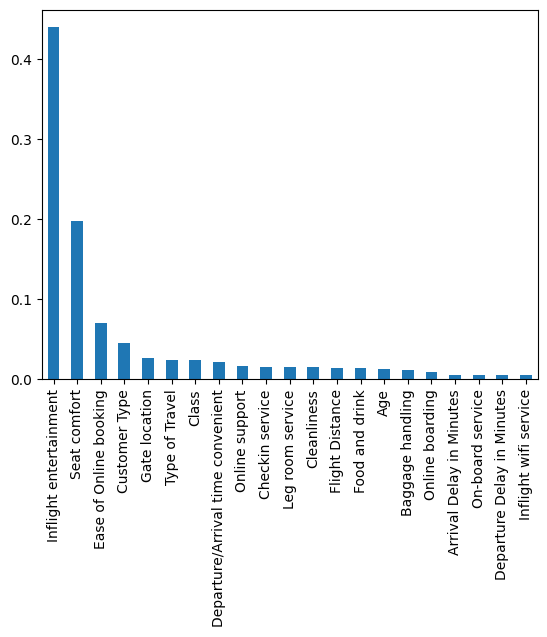

In [56]:
importances = ???

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

* The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the "most important" features for this model. 
***